# Logistical Regression

## Main difference between logistical and linear regression


1.   It predicts TRUE or FALSE (binary outcome)
2.   It works with categorical dependent variable (categorial data type)
3.   Independent variables can be of any data type

Example: Email Filtering



*   Outcome (yes or no)
*   If probability of email is spam is more than 50%, then logistical regression predicts it as spam

#Predicting Post Advertisement Purchases on Social Media

Link to the dataset: https://www.kaggle.com/datasets/akram24/social-network-ads

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing from sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Dataset and Analysis

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


# Visual Representation

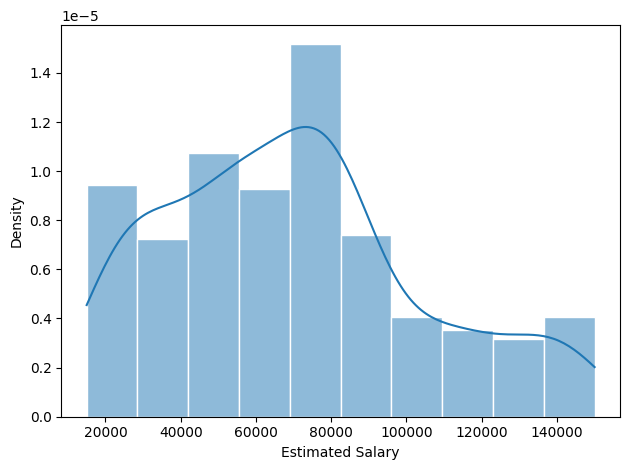

In [ ]:
#look at estimated salary distribution

sns.histplot(
    df["EstimatedSalary"],
    bins=10,
    kde=True,
    stat="density",
    edgecolor="white"
)

plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
#drop the unnecessary columns

clean_data = df.drop(["User ID", "Gender"], axis=1)
clean_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Correlation Matrix - heatmap

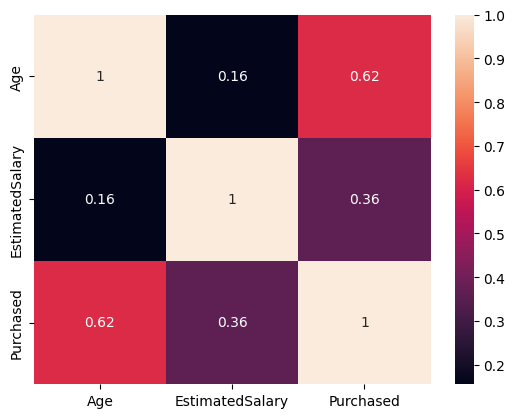

In [ ]:
sns.heatmap(clean_data.corr(), annot=True)
plt.show()

# Pairplot so we can visualize all these relations

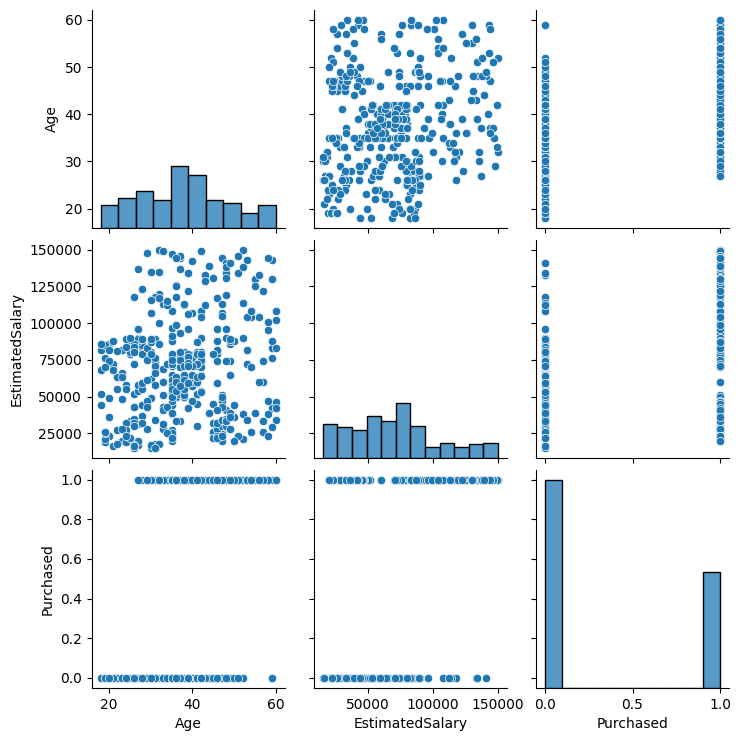

In [ ]:
sns.pairplot(clean_data)
plt.show()

# Data Preparation

In [ ]:
#split into independent and dependent variables

X = clean_data.iloc[:, :-1].values
y = clean_data.iloc[:, -1].values

In [ ]:
#split into train and test data

'''
randomly divide your feature matrix (X) and target array (y)
into two parts: one for training your model and one for evaluating its performance
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

# Feature Scaling

- We want uniformity in the measurements
- Each features have different values and different units (age - years and estimated salary)
- Make the features have same scale -> meaning one feature don't dominate the other features


In [ ]:
# Scale the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #It will calculate the mean and standard deviation for each feature using only the values in X_train
X_test = sc.transform(X_test) #You don't call fit again. Instead you only transform using mean and standard dev that were computed from X_train

In [ ]:
data = sc.fit_transform(clean_data)

print(data.mean())

print(data.std())

0.0
1.0


# Building the model

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("Intercept: ", classifier.intercept_)
print("Coefficient: ", classifier.coef_)

Intercept:  [-1.18975518]
Coefficient:  [[2.33827983 1.32991475]]


We use log to ensure that value predicted remains within the range [0,1] since we finding probabilty of an input belong a particular class
$$
\text{logit}(P) = -1.19 + 2.24 * \text{age} + 1.33 * \text{estimatedSalary}
$$

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

# Putting this into a Data Frame

In [ ]:
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_pred

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
75,1,1
76,0,0
77,0,0
78,0,0


# Model Evaluation

Unlike regression model, we cannot use the same metrics to determine the performance of the model

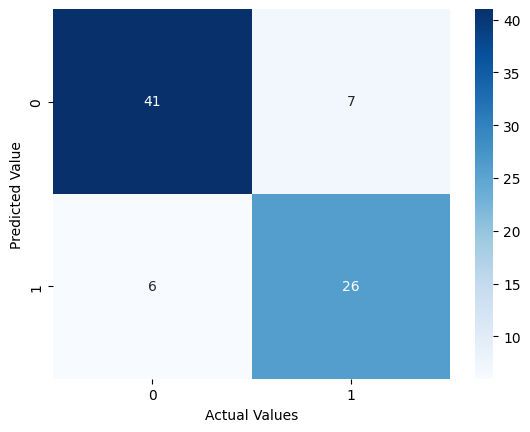

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.show()

# Classication Report

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.79      0.81      0.80        32

    accuracy                           0.84        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



# AUC/ROC Curve

AUC -> Area under the curve
ROC -> Receiving Operating Characteristics

- alternative confusion matrix
- calculates the probability of purchasing or not purchasing through the ads
-help to make decision easier by providing a treshold

In [ ]:
# Instead of predicting the class, we predict the probabilities
y_pred_probab = classifier.predict_proba(X_test)

'''
fpr: false positive rate
tpr: true positive rate
thresholds: probability cutoffs
'''
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probab[:, 1])

# Visual Representation

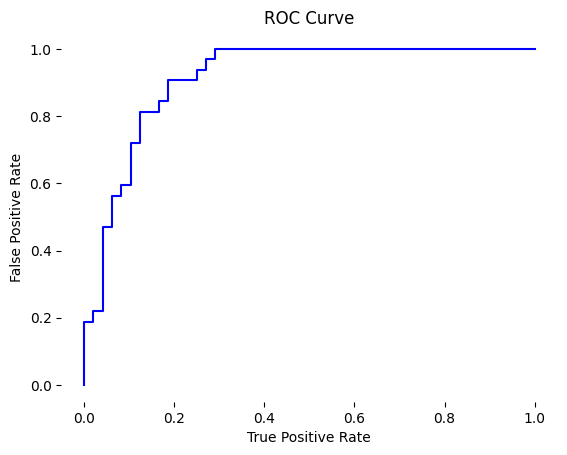

In [ ]:
plt.plot(fpr, tpr, label="Logistic Regression", color="blue")
plt.title('ROC Curve')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.box(False)
plt.show()